In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt t
from sklearn.metrics import mean_squared_error
from scipy import stats

In [207]:
df = pd.read_csv("healthdata.csv")

In [208]:
def laplaceMechanism(x, epsilon, upper_limit):
    not_in_range = True
    while (not_in_range):
        private_val = x + np.random.laplace(0, 1.0/epsilon, 1)[0]
        if (private_val > upper_limit):
            private_val = upper_limit
            not_in_range = False
        if (private_val > 0):
            not_in_range = False
    return private_val

def gaussianMechanism(x, epsilon, delta, upper_limit):
    sigma = np.sqrt(2 * np.log(1.25 / delta)) * 1 / epsilon
    not_in_range = True
    while (not_in_range):
        private_val = x + np.random.normal(0, sigma, 1)[0]
        if (private_val > upper_limit):
            private_val = upper_limit
            not_in_range = False
        if (private_val >= 0):
            not_in_range = False
    return private_val

In [209]:
def mape(y_true, y_pred):
    return np.abs((y_true - y_pred) / y_true) * 100
def rmse(y_true, y_pred):
    return np.sqrt((y_pred - y_true)**2)
def mape_array(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [210]:
# Demo
normal_average = []
adj_average = []
for x in range(0, 5):
    df_test = pd.read_csv("healthdata.csv")
    df_adjacent = df_test.iloc[1:]
    epsilon = 0.5
    nrm_query = np.sum(df_test['wage'] < 13)
    adj_query = np.sum(df_adjacent['wage'] < 13)
    private_nrm_query = laplaceMechanism(nrm_query, epsilon, 200)
    private_nrm_adj_query = laplaceMechanism(adj_query, epsilon, 200)
    #df['wage'] = df['wage'].apply(laplaceMechanism, args=(0.1,200))
    #df_adjacent['wage'] = df_adjacent['wage'].apply(laplaceMechanism, args=(0.1,200))
    normal_average.append(private_nrm_query)
    adj_average.append(private_nrm_adj_query)

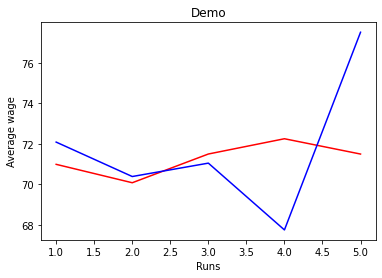

In [211]:
# Demo
runs = [1,2,3,4,5]
plt.plot(runs, normal_average, 'r')
plt.plot(runs, adj_average, 'b')
plt.xlabel('Runs')
plt.ylabel('Average wage')
plt.title("Demo")
plt.show()

In [212]:
df = pd.read_csv("healthdata.csv")
#df['wage'] = df['wage'].apply(laplaceMechanism, args=(0.1,200))
#df['wage'] = df['wage'].apply(laplaceMechanism, args=(0.1, 1/400, 200))

epsilons = np.logspace(-2,1,25)
num_of_runs_for_epsilon = 1000
wage_query = np.sum(df['wage'] < 13)
age_query = np.sum(df['age'] > 30)
problem_query = [
    np.sum(df['problem'] == 'breathing'),
    np.sum(df['problem'] == 'dental'),
    np.sum(df['problem'] == 'mental'),
    np.sum(df['problem'] == 'heart')
]

In [213]:
laplace_rmse = []
laplace_mape = []
for epsilon in epsilons:
    average_rmse = []
    average_mape = []
    for x in range(num_of_runs_for_epsilon):
        private_wage_query = laplaceMechanism(wage_query, epsilon, 200)
        average_rmse.append(rmse(wage_query, private_wage_query))
        average_mape.append(mape(wage_query, private_wage_query))
    laplace_rmse.append(np.mean(average_rmse))
    laplace_mape.append(np.mean(average_mape))

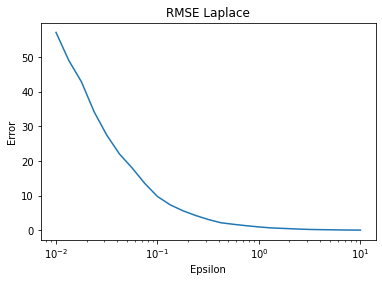

In [214]:
plt.semilogx(epsilons, laplace_rmse)
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("RMSE Laplace")
plt.show()

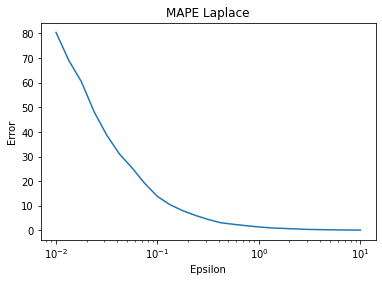

In [215]:
plt.semilogx(epsilons, laplace_mape)
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("MAPE Laplace")
plt.show()

In [216]:
delta_values = [1/100, 1/200, 1/1000, 1/10000]
gaussian_error = []
for delta_value in delta_values:
    gaussian_rmse = []
    gaussian_mape = []
    for epsilon in epsilons:
        average_rmse = []
        average_mape = []
        for x in range(num_of_runs_for_epsilon):
            private_wage_query = gaussianMechanism(wage_query, epsilon, delta_value, 200)
            average_rmse.append(rmse(wage_query, private_wage_query))
            average_mape.append(mape(wage_query, private_wage_query))
        gaussian_rmse.append(np.mean(average_rmse))
        gaussian_mape.append(np.mean(average_mape))
    gaussian_error.append([gaussian_rmse, gaussian_mape])

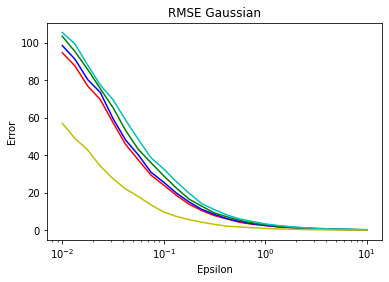

In [217]:
colors = ['r', 'b', 'g', 'c']
for idx, error in enumerate(gaussian_error):
    plt.semilogx(epsilons, error[0], colors[idx])
   

plt.semilogx(epsilons, laplace_rmse, 'y')
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("RMSE Gaussian")
plt.show()

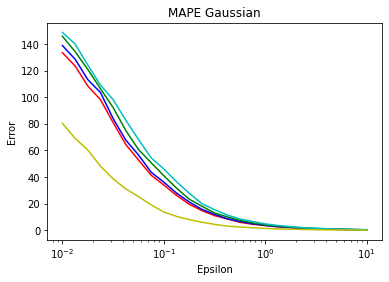

In [218]:
for idx, error in enumerate(gaussian_error):
    plt.semilogx(epsilons, error[1], colors[idx])

plt.semilogx(epsilons, laplace_mape, 'y')
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("MAPE Gaussian")
plt.show()
#https://www.sciencedirect.com/science/article/pii/S0166218X1630169X
#https://desfontain.es/privacy/differential-privacy-in-practice.html

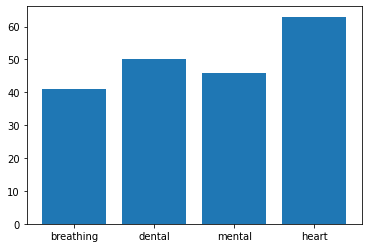

In [219]:
x = np.arange(4)
plt.bar(x, height=problem_query)
plt.xticks(x, ['breathing','dental','mental', 'heart'])
plt.show()

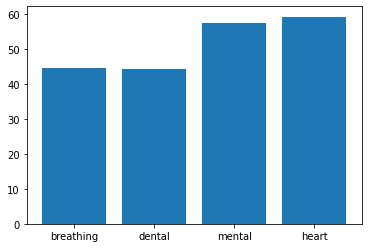

In [220]:
private_problem_query = []
for value in problem_query:
    private_problem_query.append(laplaceMechanism(value, 0.1, 200))

plt.bar(x, height=private_problem_query)
plt.xticks(x, ['breathing','dental','mental', 'heart'])
plt.show()  

In [221]:
laplace_categorical_rmse = []
laplace_categorical_mape = []
for epsilon in epsilons:
    average_rmse = []
    average_mape = []
    for x in range(num_of_runs_for_epsilon):
        private_problem_query = []
        for value in problem_query:
            private_problem_query.append(laplaceMechanism(value, epsilon, 200))
        average_rmse.append(mean_squared_error(problem_query, private_problem_query,                squared=False))
        average_mape.append(mape_array(problem_query, private_problem_query))
    laplace_categorical_rmse.append(np.mean(average_rmse))
    laplace_categorical_mape.append(np.mean(average_mape))

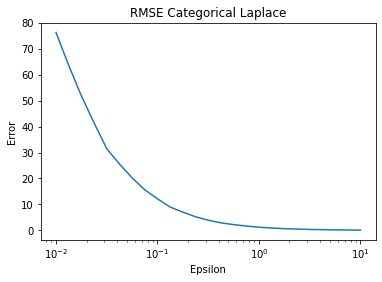

In [222]:
plt.semilogx(epsilons, laplace_categorical_rmse)
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("RMSE Categorical Laplace")
plt.show()

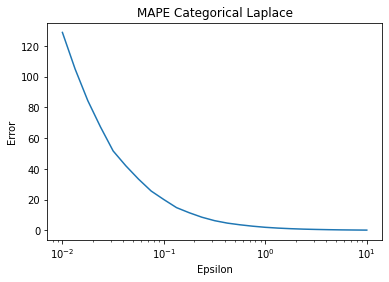

In [223]:
plt.semilogx(epsilons, laplace_categorical_mape)
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("MAPE Categorical Laplace")
plt.show()

In [224]:
gaussian_categorical_error = []
for delta_value in delta_values:
    gaussian_rmse = []
    gaussian_mape = []
    for epsilon in epsilons:
        average_rmse = []
        average_mape = []
        for x in range(num_of_runs_for_epsilon):
            private_problem_query = []
            for value in problem_query:
                private_problem_query.append(gaussianMechanism(value, epsilon, delta_value, 200))

            average_rmse.append(mean_squared_error(problem_query, private_problem_query, squared=False))
            average_mape.append(mape_array(problem_query, private_problem_query))

        gaussian_rmse.append(np.mean(average_rmse))
        gaussian_mape.append(np.mean(average_mape))
    gaussian_categorical_error.append([gaussian_rmse, gaussian_mape])

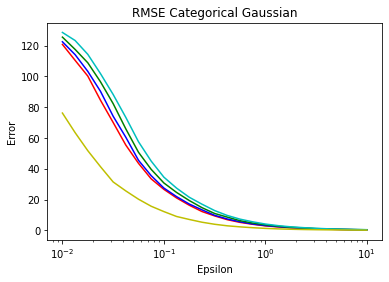

In [225]:
for idx, error in enumerate(gaussian_categorical_error):
    plt.semilogx(epsilons, error[0], colors[idx])

plt.semilogx(epsilons, laplace_categorical_rmse, 'y')
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("RMSE Categorical Gaussian")
plt.show()

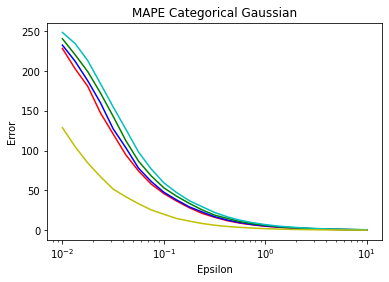

In [226]:
for idx, error in enumerate(gaussian_categorical_error):
    plt.semilogx(epsilons, error[1], colors[idx])

plt.semilogx(epsilons, laplace_categorical_mape, 'y')
plt.xlabel('Epsilon')
plt.ylabel('Error')
plt.title("MAPE Categorical Gaussian")
plt.show()
#https://github.com/BorjaBalle/analytic-gaussian-mechanism/blob/master/agm-example.py
#https://github.com/IBM/discrete-gaussian-differential-privacy